In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df={ "ID":[1,2,3,4,5,6,7,8],
    "Sepal length":[4.51,5.10,6.65,4.77,5.51,4.39,7.68,5.90],
    "Petal length":[1.33,3.01,5.41,1.86,3.85,1.13,6.41,4.1],
    "Specie":["set","ver","vir","set","ver","set","vir","ver"]}

df=pd.DataFrame(df)
df

,ID,Sepal length,Petal length,Specie
0,1,4.51,1.33,set
1,2,5.10,3.01,ver
2,3,6.65,5.41,vir
3,4,4.77,1.86,set
4,5,5.51,3.85,ver
5,6,4.39,1.13,set
6,7,7.68,6.41,vir
7,8,5.90,4.10,ver


In [2]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from scipy import stats


In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull(  ).sum(  )

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


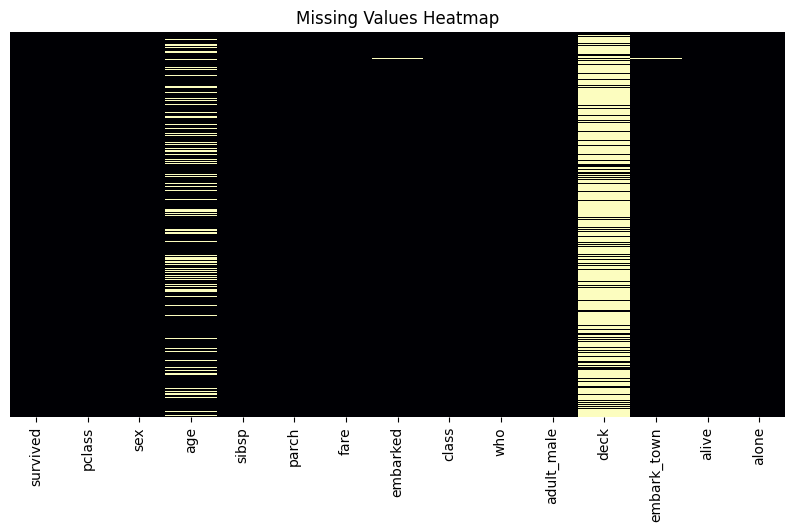

In [16]:
#visuaoising missing vslues with a heat map
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='magma',cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

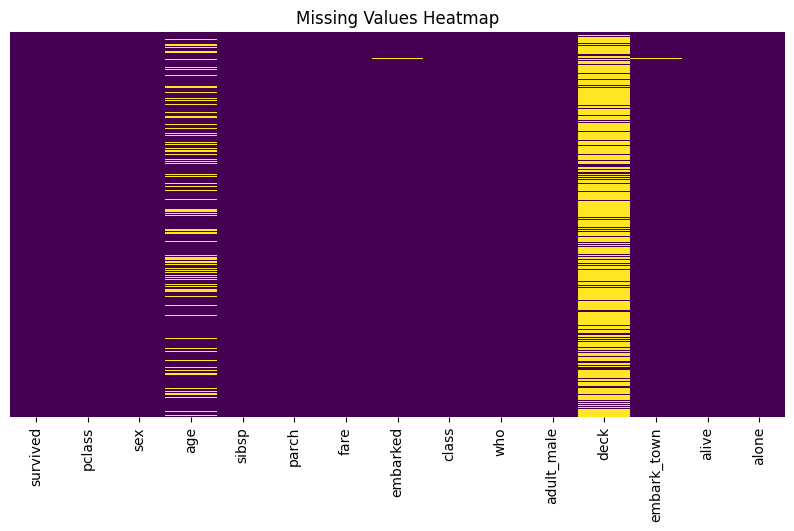

In [17]:
#visuaoising missing vslues with a heat map color changed to viridis
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

<Axes: >

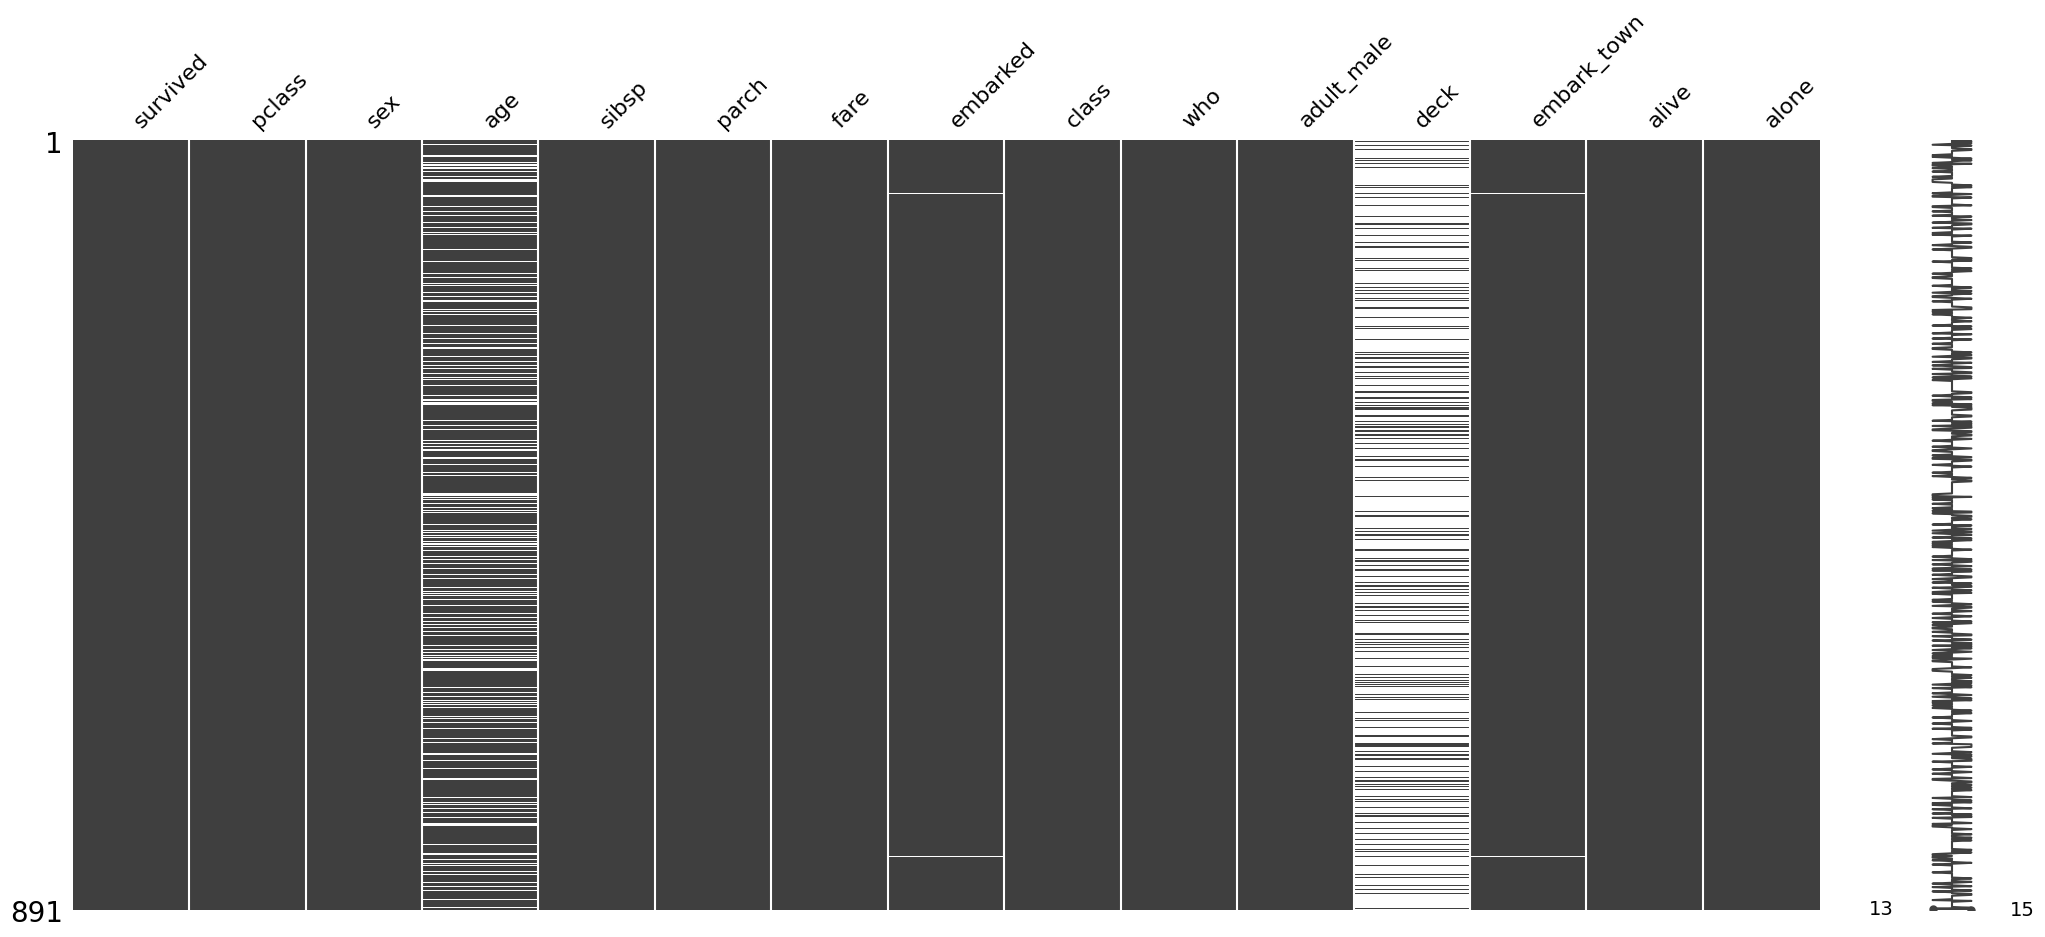

In [14]:
import missingno as mn
mn.matrix(df)

In [18]:
df['age']=df['age'].fillna(df['age'].mean())

In [30]:
print(df['deck'].mode())

0    C
Name: deck, dtype: category
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [20]:
df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])
#we took 0 specially because if there was few most occuring letters then it could show as a series of
#most occuring letter so we specified as 0 to avoid confusion

In [22]:
df['deck']=df['deck'].fillna(df['deck'].mode()[0])

In [23]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,0
class,0
who,0


In [25]:
df['deck'].fillna(df['deck'].mode())

,deck
0,C
1,C
2,C
3,C
4,C
...,...
886,C
887,B
888,C
889,C


In [24]:
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Frequency')

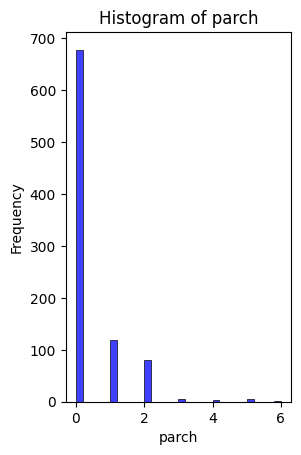

In [26]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['parch'], bins=30, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of parch')
plt.xlabel('parch')
plt.ylabel('Frequency')


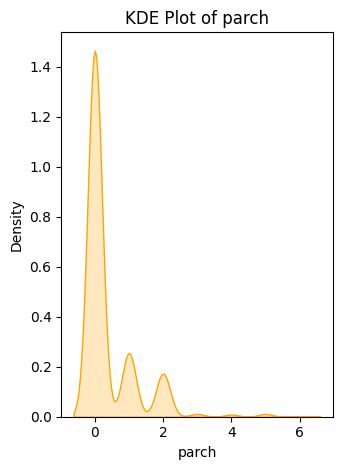

In [27]:
# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch'], fill=True, color='orange')
plt.title('KDE Plot of parch')
plt.xlabel('parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


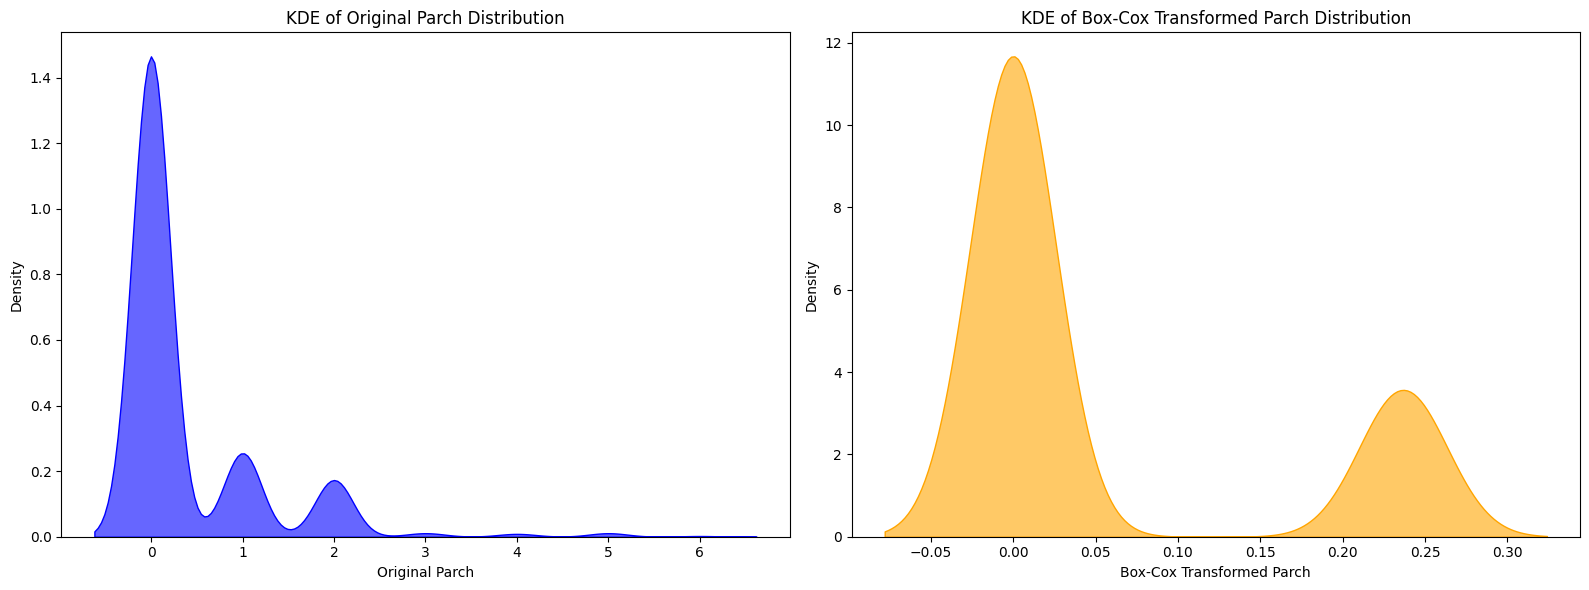

In [31]:
# from scipy import stats # incase you haven’t installed stats before
# Apply Box-Cox Transformation
# Box-Cox requires positive data, so we ensure 'parch' is > 0
# Since 'parch' is count data, we add a small constant
df['parch_shifted'] = df['parch'] + 1  # Shift by 1 to avoid zeros
df['parch_boxcox'], _ = stats.boxcox(df['parch_shifted'])

# Step 3: Visualize the distributions using KDE
plt.figure(figsize=(16, 6))

# KDE plot for original parch
plt.subplot(1, 2, 1)
sns.kdeplot(df['parch'], fill=True, color='blue', alpha=0.6)
plt.title('KDE of Original Parch Distribution')
plt.xlabel('Original Parch')
plt.ylabel('Density')

# KDE plot for Box-Cox transformed parch
plt.subplot(1, 2, 2)
sns.kdeplot(df['parch_boxcox'], fill=True, color='orange', alpha=0.6)
plt.title('KDE of Box-Cox Transformed Parch Distribution')
plt.xlabel('Box-Cox Transformed Parch')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [34]:
scaler = MinMaxScaler()

# Apply Min-Max Scaling to 'age' and 'fare'
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age', 'fare']])


In [37]:
df[['age_scaled','fare_scaled']]

,age_scaled,fare_scaled
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
886,0.334004,0.025374
887,0.233476,0.058556
888,0.367921,0.045771
889,0.321438,0.058556


from matplotlib import pyplot as plt
_df_0['age_scaled'].plot(kind='hist', bins=20, title='age_scaled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['fare_scaled'].plot(kind='hist', bins=20, title='fare_scaled')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='age_scaled', y='fare_scaled', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['age_scaled'].plot(kind='line', figsize=(8, 4), title='age_scaled')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['fare_scaled'].plot(kind='line', figsize=(8, 4), title='fare_scaled')
plt.gca().spines[['top', 'right']].set_visible(False)

In [38]:
df['family_size'] = df['sibsp'] + df['parch'] + 1 # Including the passenger themselves


In [39]:
df['fare_per_person'] = df['fare'] / df['family_size']

In [40]:
df['is_not_alone'] = ((df['sibsp'] > 0) | (df['parch']>0)).astype(int)